# The battle of the neighborhoods - Open a hotel in Brooklyn, New York City 

## Introduction 

### In New York City, the borough of Manhattan is an important location for many groups of individuals and businesses. Aside from being a financial hub for thousands of business travelers each year, it is also a prime destination for millions of tourists traveling to New York City annually. This has resulted in the cost of hotels in Manhattan being exponentially higher than that of the neighboring boroughs. 

## Business problem 

### This purpose of this project is to find the best, or optimal, neighborhood in Brooklyn, New York to build a hotel for vacationers and businesspeople alike, who choose not to stay in the more expensive hotels in Manhattan. Specifically, the analysis will determine the closest neighborhood in Brooklyn relative to Manhattan, with the lowest number of existing hotels. The results of this report can be used as a reference by hotel stakeholders who are interested in building a hotel in Brooklyn for Manhattan bound travelers. 
### One option to alleviate this problem for travelers is to build a hotel in the less expensive boroughs of Bronx, Brooklyn, or Queens. From there, travelers can book a hotel in a neighboring borough and commute to downtown Manhattan. It is important to build a hotel as close to downtown Manhattan as possible, as to reduce travel time and cost.¶
### For a hotel builder, knowing the optimal neighborhood in a neighboring borough to build the hotel is key to solving these problems. By knowing the best neighborhood to build the hotel, Manhattan bound travelers can reduce booking costs, travel time, and overall travel cost. Additionally, knowing the number of existing hotels within the neighborhood in question and where they are located can minimize competition from other hotels in that area. 
### This project will focus on finding the optimal neighborhood in the Brooklyn borough. 



## Data Collection  

### In order to address this problem, we will need to find the neighborhood that is closest to downtown Manhattan with the minimum number of hotels. We will need to acquire data on the neighborhoods and hotels in New York City. Specifically, we will need location data on all neighborhoods in the borough of Brooklyn and the total number of hotels in each neighborhood within that borough. Data was obtained from two locations.¶
### Neighborhood data was acquired from New York University (NYU)
### url: https://geo.nyu.edu/catalog/nyu_2451_34572
### The neighborhood data downloaded from the NYU website comes in JSON format and has the coordinates of all the neighborhoods in all five New York City boroughs.
### Hotel data was acquired from Four-Square and venue platform.
### url: www.foursquare.com
### The hotel data for each Brooklyn neighborhood is obtained from the Four-Square location platform using the coordinates of each neighborhood. This will allow us to have a map of Manhattan and Brooklyn along with the data points that we are analyzing.
### With the data gathered from both NYU and Four-Square we can create K-Means clusters, use Matplotlib to create graphs, and Folium to visualize the maps.
 


## Import libraries 
### Before downloading data we will install the required libraries necessary to solve this problem. 

In [1]:
# Install jupyterlab  
!conda install -c conda-forge jupyterlab 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 

Updating jupyterlab is constricted by 

ibm-wsrt-py37main-keep -> requires jupyterlab==2.2.6[build=*]

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - jupyterlab


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  con

pywavelets-1.1.1     | 4.4 MB    | ##################################### | 100% 
numpy-1.20.2         | 5.8 MB    | ##################################### | 100% 
boto3-1.17.57        | 70 KB     | ##################################### | 100% 
testpath-0.4.4       | 85 KB     | ##################################### | 100% 
cached-property-1.5. | 4 KB      | ##################################### | 100% 
soupsieve-2.0.1      | 30 KB     | ##################################### | 100% 
dbus-1.13.6          | 572 KB    | ##################################### | 100% 
psycopg2-2.8.6       | 168 KB    | ##################################### | 100% 
lerc-2.2.1           | 213 KB    | ##################################### | 100% 
bokeh-2.3.1          | 8.2 MB    | ##################################### | 100% 
pickleshare-0.7.5    | 9 KB      | ##################################### | 100% 
pyparsing-2.4.7      | 60 KB     | ##################################### | 100% 
pyzmq-22.0.3         | 524 K

entrypoints-0.3      | 8 KB      | ##################################### | 100% 
importlib_metadata-4 | 4 KB      | ##################################### | 100% 
chardet-4.0.0        | 204 KB    | ##################################### | 100% 
partd-1.2.0          | 18 KB     | ##################################### | 100% 
openssl-1.1.1k       | 2.1 MB    | ##################################### | 100% 
astropy-4.2.1        | 7.5 MB    | ##################################### | 100% 
google-pasta-0.2.0   | 42 KB     | ##################################### | 100% 
toolz-0.11.1         | 46 KB     | ##################################### | 100% 
wcwidth-0.2.5        | 33 KB     | ##################################### | 100% 
libgfortran4-7.5.0   | 1.3 MB    | ##################################### | 100% 
pip-21.0.1           | 1.1 MB    | ##################################### | 100% 
pygments-2.8.1       | 736 KB    | ##################################### | 100% 
urllib3-1.26.4       | 99 KB

libwebp-base-1.2.0   | 815 KB    | ##################################### | 100% 
matplotlib-3.4.1     | 7 KB      | ##################################### | 100% 
libedit-3.1.20191231 | 121 KB    | ##################################### | 100% 
ptyprocess-0.7.0     | 16 KB     | ##################################### | 100% 
kiwisolver-1.3.1     | 78 KB     | ##################################### | 100% 
libcurl-7.76.1       | 328 KB    | ##################################### | 100% 
pysocks-1.7.1        | 27 KB     | ##################################### | 100% 
patsy-0.5.1          | 187 KB    | ##################################### | 100% 
iniconfig-1.1.1      | 8 KB      | ##################################### | 100% 
lxml-4.6.3           | 1.5 MB    | ##################################### | 100% 
blas-1.0             | 1 KB      | ##################################### | 100% 
pyopenssl-20.0.1     | 48 KB     | ##################################### | 100% 
fsspec-2021.4.0      | 75 KB

done


In [2]:
# Import necessary libraries 
import numpy as np #Library to handle data in a vectorized manner 

import pandas as pd # library for data analysis 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

! pip install geopy 
from geopy.geocoders import Nominatim # convert an address into longitude and latitude values 

import json # library to handle JSON files 

import requests # library to handle request 
from pandas.io.json import json_normalize # Transform JSON file into a pandas dataframe 

# Matplotlib and associated plotting modules 
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means for clustering 
from sklearn.cluster import KMeans

! pip install folium 
import folium # Map rendering library 
! pip install RISE

print('All libraries and modules installed') 

     |████████████████████████████████| 94 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 4.3 MB 19.0 MB/s eta 0:00:01


All libraries and modules installed


## Download and explore the dataset 
### We will download and explore the dataset from both the borough of Manhattan and Brooklyn. The New York neighborhood dataset is already located on IBM storage so we will download it from there using !wget command. 

In [3]:
# Download the dataset 
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!') 

Data downloaded!


### Load and explore the data 

In [4]:
# load data 
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data) 

In [5]:
newyork_data 

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

### All the neighborhood data is in the 'feature' key so lets assign it a new variable neighborhood_data 

In [6]:
# Assign it a new variable neighborhood_data
neighborhood_data = newyork_data['features']
neighborhood_data[0] 

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

### Tranform the data into a pandas dataframe
### The next task is to tranform this data of nested Python dictionaries into a pandas dataframe. We will start by creating an empty dataframe. 

In [7]:
#define the dataframe columns 
columns_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']

# Create dataframe with empthy columns
neighborhoods = pd.DataFrame(columns = columns_names)

# View empty dataframe
neighborhoods 

,Borough,Neighborhood,Latitude,Longitude


### Next we will loop the data and fill the empty dataframe one row at a time. 

In [9]:
 for data in neighborhood_data:
    borough = data['properties']['borough']
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough':borough, 
                                           'Neighborhood':neighborhood_name,
                                           'Latitude':neighborhood_lat, 
                                            'Longitude':neighborhood_lon}, ignore_index=True) 

### Examine the resulting dataframe. 

In [10]:
neighborhoods.head() 

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### Verify the neighborhoods and that there are 5 boroughs in dataframe. 

In [11]:
print('Boroughs in the NYC:',len(neighborhoods['Borough'].unique()))
print ('Data dimension:', neighborhoods.shape) 

Boroughs in the NYC: 5
Data dimension: (306, 4)


## Methodology 

### As previously mentioned, our goal is to find the neighborhood that’s closest to mid-town Manhattan with the minimum number of hotels. In the section above we acquired and cleaned the necessary data needed to accomplish this goal. In this section I applied various data science techniques and methods to the data to determine the optimum Brooklyn neighborhood. The following task was performed.

### I used the Python Folium map library to visualize and analyze the layout of the Brooklyn neighborhoods relative to midtown Manhattan.
### I used the Python Folium map library to visualize and analyze the layout of the Brooklyn hotels relative to midtown Manhattan.
### Use Matplotlib to create bar charts of the hotels in each Brooklyn neighborhoods for more analysis.
### Use the Haversine formula to calculate the distance from each Brooklyn neighborhood to mid-town Manhattan. This distance data was added to the final feature set for clustering.
### Combine and normalize all relevant features for clustering.
### Apply K-means clustering method to the feature set.
### Use the Python Folium map library to the visualize and analyze the clusters. 

### Our focus is on the boroughs of Brooklyn and Manhattan. We will filter the dataframe to show Brooklyn neighborhoods. 

In [12]:
Brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop = True)
Brooklyn_data.head() 

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


### Create a map of New York city with Brooklyn neighborhoods imposed on top.
### In order to get a map of New York city we need to first get the longitude and latitude of Bronx and Manhattan. We will use geopy library to accomplish this. 

In [13]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude)) 

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [14]:
address = '234 W 42nd St, New York, NY 10036'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
man_lat = location.latitude
man_long = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(man_lat, man_long)) 

The geograpical coordinate of Manhattan are 40.75668515, -73.98926649582987.


### We will now create a map of New York city with Brooklyn neighborhoods superimposed on top. 

In [15]:
# create map of Brooklyn using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# Loop through bronx_data and add neighborhood markers to map
for lat, lng, label in zip(Brooklyn_data['Latitude'], Brooklyn_data['Longitude'], Brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=7,
        parse_html=False).add_to(map_brooklyn) 
    
folium.CircleMarker(
        [man_lat, man_long],
        radius=10,
        popup='Midtown Manhattan',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=7,
        parse_html=False).add_to(map_brooklyn) 
    
map_brooklyn 

### The above map shows the Brooklyn neighborhoods that are closest to Manhattan. The neighborhoods in Brooklyn are represented by the blue dots and the red dot represents Time Square in Mid-town Manhattan. Midtown Manhattan is generally where most business travelers and tourist start there visit so it only makes sense to use this location as part of our distance calculation. To determine which neighborhood in Brooklyn is closer to Manhattan, we will use the location data to calculate the distance between mid-town Manhattan and the Brooklyn neighborhoods. But before we do that let take a look at where hotels are located in Brooklyn relative to Manhattan. 

### Create a map of hotels in Brooklyn. In order to display the hotels in Brooklyn, we need to access them from the FourSquare database. We will access all the venues in the Brooklyn neighborhoods then filter the hotel data. 
### We will start by inputting our FourSquare credentials. 

In [16]:
#Create a map of hotels in Brooklyn. Use FourSquare credentials. 

CLIENT_ID = 'FYBKTTMPRPOM0RA33A4EDPY2ILPEEEAWFDVFPMDWSOTYX4OH' # your Foursquare ID
CLIENT_SECRET = 'OBEK41MHSMFH555UIJMBQXIOBC1EVIZSJBZN20F21XUOQZYT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET) 

Your credentails:
CLIENT_ID: FYBKTTMPRPOM0RA33A4EDPY2ILPEEEAWFDVFPMDWSOTYX4OH
CLIENT_SECRET:OBEK41MHSMFH555UIJMBQXIOBC1EVIZSJBZN20F21XUOQZYT


### Create a function to get all venues in Brooklyn. 

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
         
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues) 

### Call the getNearbyVenues function and store the results in Brooklyn_venues.  

In [19]:
Brooklyn_venues = getNearbyVenues(names=Brooklyn_data['Neighborhood'],
                                   latitudes=Brooklyn_data['Latitude'],
                                   longitudes=Brooklyn_data['Longitude']
                                  ) 

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


### Display the Brooklyn_venues dataframe head and dimension. 

In [22]:
print(Brooklyn_venues.shape)
Brooklyn_venues.head() 

(2757, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Georgian Dream Cafe and Bakery,40.625586,-74.030196,Caucasian Restaurant
3,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
4,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot


### Now we will filter the hotel data from the Brooklyn_venue dataframe. 

In [23]:
Hotel_data = Brooklyn_venues[Brooklyn_venues['Venue Category'] == 'Hotel'].reset_index(drop = True)
print(Hotel_data.shape)
Hotel_data.head() 

(10, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Best Western Gregory Hotel,40.624357,-74.027360,Hotel
1,Greenpoint,40.730201,-73.954241,Franklin Guest House,40.733049,-73.958062,Hotel
2,Sheepshead Bay,40.586890,-73.943186,Best Western Plus Brooklyn Bay Hotel,40.584164,-73.938524,Hotel
3,Borough Park,40.633131,-73.990498,Park House Hotel,40.636598,-73.993681,Hotel
4,Downtown,40.690844,-73.983463,Hilton Brooklyn,40.689617,-73.987972,Hotel


### Next create a map of Brooklyn using latatude and longitude values. 

In [24]:
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# Loop through Brooklyn_data and add neighborhood markers to map
for lat, lng, label in zip(Hotel_data['Venue Latitude'], Hotel_data['Venue Longitude'], Hotel_data['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='green',
        fill_opacity=7,
        parse_html=False).add_to(map_brooklyn) 
    
folium.CircleMarker(
        [man_lat, man_long],
        radius=10,
        popup='Midtown Manhattan',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=7,
        parse_html=False).add_to(map_brooklyn)
    
map_brooklyn 

### The above map shows us that there are a handfull of hotels that are relatively close to Manhattan. Let's next view a number of hotels in each Brooklyn neighborhood. 

In [25]:
# Use one hot encoding on the Venue Category 
Hotel_onehot = pd.get_dummies(Hotel_data[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Hotel_onehot.insert(0,'Neighborhood', Hotel_data['Neighborhood'], True ) 
Hotel_onehot.head() 

,Neighborhood,Hotel
0,Bay Ridge,1
1,Greenpoint,1
2,Sheepshead Bay,1
3,Borough Park,1
4,Downtown,1


In [26]:
# Sum up the hotels in each neighborhood 
Hotel_df = Hotel_onehot.groupby('Neighborhood').sum()
Hotel_df 

,Hotel
Neighborhood,
Bay Ridge,1
Borough Park,1
Broadway Junction,2
Downtown,1
Fort Hamilton,1
Fulton Ferry,1
Greenpoint,1
North Side,1
Sheepshead Bay,1


In [27]:
# Descriptive statistic 
Hotel_df.describe() 

,Hotel
count,9.000000
mean,1.111111
std,0.333333
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [28]:
#Import matplotlib for plotting
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0 

Matplotlib version:  3.4.1


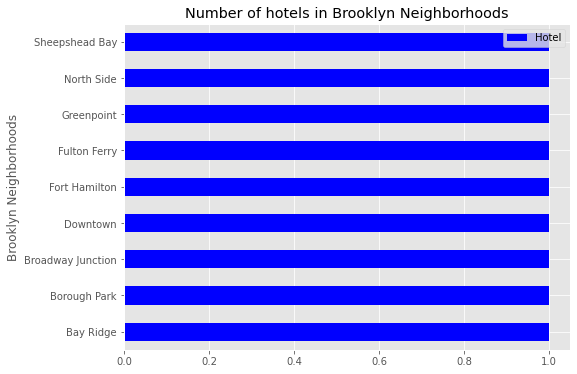

In [62]:
#Plot bar-graph of hotels vs neighborhood
Hotel_df.plot(kind='barh', figsize=(8, 6), color = 'blue')

plt.title('Number of hotels in Brooklyn Neighborhoods')
plt.ylabel('Brooklyn Neighborhoods')

plt.show() 

### The above bar graph does not seem to help as much as the map, as it appears that the most hotels that a neighborhood in Brooklyn has is 1 hotel.  We are ideally looking for the neighborhood in Brooklyn that is closest to mid-town Manhattan with the fewest amount of hotels. Seeing that the closest neighborhoods each have 1 hotel does not help us to narrow down which neighborhoods to look into very much. Lets do some more analysis and see if we can find a better way to find the optimal Brooklyn neighborhood. 

### Next we will calculate the distance between Manhattan and the Brooklyn neighborhoods. To calculate the distance between the Brooklyn neighborhoods and mid-town Manhattan, we will use the Haversine formula. 

In [29]:
#Calculate the distance between the Manhattan and Brooklyn neigborhoods
 
!pip install git+https://github.com/nathanrooy/spatial-analysis # install and import the haversine function 


  Cloning https://github.com/nathanrooy/spatial-analysis to /tmp/wsuser/pip-req-build-grm969sf
  Running command git clone -q https://github.com/nathanrooy/spatial-analysis /tmp/wsuser/pip-req-build-grm969sf
  Created wheel for spatial: filename=spatial-0.0.1-py3-none-any.whl size=15770 sha256=a0ba476192ffce01a4f7eb1c909efc6c43232d1783251a333a7d2765744d0888
  Stored in directory: /tmp/wsuser/pip-ephem-wheel-cache-fcub798_/wheels/0b/2a/7c/3a4728653ce163f9153edb3d87fc4e2b6579e019ec154a500a
Successfully built spatial


In [31]:
from spatial import haversine
>>> p1 = [man_long, man_lat]  # p1=[longitude_1, latitude_1] of manhattan
>>> p2 = [longitude, latitude]  # p2=[longitude_2, latitude_2] of neighborhoods in Brooklyn 
>>> haversine(p1, p2).mi()  # miles  

7.651800362970973

### As you can see given the longitude and latitude of two points p1 and p2 you can calculate the distance between them using this function. Now let apply this to all the neighborhoods in Brooklyn and mid-town Manhattan. 
### We will loop through Brooklyn_data and calculate the distance from each neighborhood to mid-town Manhattan. 


In [32]:
Brooklyn_data.head() 

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


### I created a function called getDistance that will accept the longitude and latitude values of each neighborhood and returns the distance between each neighborhood and mid-town Manhattan. 

In [34]:
# Function to calculate the distance between each Queens neighborhood and Manhattan 
def getDistance(names,longitude,latitude):
    dist_list=[]
    for name, lat, lng in zip(names, latitude, longitude):
        print(name)
        p1 = [man_long, man_lat] # longitude and latitude of mid-town Manhattan 
        p2 = [lng, lat]   # Longitude and latitude of Queens neighborhoods 
        distance = haversine(p1, p2).mi()   # distance from Queens neighborhood to mid-town Manhattan 
        dist_list.append(distance)     # add distances to distance list 
    return(dist_list) 

### Now let call the detDistance function and return the result list to distance_list. 

In [35]:
distance_list = getDistance(names=Brooklyn_data['Neighborhood'],
                                   latitude=Brooklyn_data['Latitude'],
                                   longitude=Brooklyn_data['Longitude']
                                  ) 

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


### View distance_list. 

In [36]:
distance_list[0:10] 

[9.299109214771164,
 10.070020752591962,
 7.7880302076328425,
 2.590409609905586,
 11.184066013192036,
 12.491528938073293,
 11.977643968152497,
 9.969165078875738,
 8.471744769300146,
 6.402100735240217]

### Verify that all rows in Brooklyn_data was processed by comparing the distance_list and Brooklyn_data dimension. 

In [37]:
print(len(distance_list))
print(Brooklyn_data.shape) 

70
(70, 4)


### Now we will add distance_list to Brooklyn_data. 

In [38]:
Brooklyn_data.insert(4, 'Distance', distance_list) 

In [39]:
Brooklyn_data.head() 

,Borough,Neighborhood,Latitude,Longitude,Distance
0,Brooklyn,Bay Ridge,40.625801,-74.030621,9.299109
1,Brooklyn,Bensonhurst,40.611009,-73.995180,10.070021
2,Brooklyn,Sunset Park,40.645103,-74.010316,7.788030
3,Brooklyn,Greenpoint,40.730201,-73.954241,2.590410
4,Brooklyn,Gravesend,40.595260,-73.973471,11.184066


### Lets also merge the two dataframes Brooklyn_data and Hotel_df.  

In [40]:
#Reset Hotel_df index before merging with Brooklyn_data 
Hotel_df.reset_index() 

,Neighborhood,Hotel
0,Bay Ridge,1
1,Borough Park,1
2,Broadway Junction,2
3,Downtown,1
4,Fort Hamilton,1
5,Fulton Ferry,1
6,Greenpoint,1
7,North Side,1
8,Sheepshead Bay,1


In [41]:
# Add the hotel column to Brooklyn_data by merging Brooklyn_data and Hotel_df using a left join
Brooklyn_data = pd.merge(Brooklyn_data, Hotel_df, how='left', on=['Neighborhood', 'Neighborhood']) 

In [42]:
Brooklyn_data.head() 

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel
0,Brooklyn,Bay Ridge,40.625801,-74.030621,9.299109,1.0
1,Brooklyn,Bensonhurst,40.611009,-73.995180,10.070021,NaN
2,Brooklyn,Sunset Park,40.645103,-74.010316,7.788030,NaN
3,Brooklyn,Greenpoint,40.730201,-73.954241,2.590410,1.0
4,Brooklyn,Gravesend,40.595260,-73.973471,11.184066,NaN


In [43]:
# Replace all NAN value in the hotels column to zero 
Brooklyn_data['Hotel'] = Brooklyn_data['Hotel'].fillna(0)
Brooklyn_data.head() 

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel
0,Brooklyn,Bay Ridge,40.625801,-74.030621,9.299109,1.0
1,Brooklyn,Bensonhurst,40.611009,-73.995180,10.070021,0.0
2,Brooklyn,Sunset Park,40.645103,-74.010316,7.788030,0.0
3,Brooklyn,Greenpoint,40.730201,-73.954241,2.590410,1.0
4,Brooklyn,Gravesend,40.595260,-73.973471,11.184066,0.0


### We now have both the distance data and the hotel data added to Brooklyn_data. To determine the ideal neighborhoods we will cluster this data set. 

In [45]:
# Create a copy of the Queens_data for clustering 
Brooklyn_group_clustering = Brooklyn_data.copy() 

In [46]:
Brooklyn_group_clustering.head() 

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel
0,Brooklyn,Bay Ridge,40.625801,-74.030621,9.299109,1.0
1,Brooklyn,Bensonhurst,40.611009,-73.995180,10.070021,0.0
2,Brooklyn,Sunset Park,40.645103,-74.010316,7.788030,0.0
3,Brooklyn,Greenpoint,40.730201,-73.954241,2.590410,1.0
4,Brooklyn,Gravesend,40.595260,-73.973471,11.184066,0.0


In [47]:
# Drop catagorical data before clustering 
Brooklyn_group_clustering = Brooklyn_group_clustering.drop(['Borough', 'Neighborhood'], axis = 1) 

In [48]:
Brooklyn_group_clustering.head()  

,Latitude,Longitude,Distance,Hotel
0,40.625801,-74.030621,9.299109,1.0
1,40.611009,-73.995180,10.070021,0.0
2,40.645103,-74.010316,7.788030,0.0
3,40.730201,-73.954241,2.590410,1.0
4,40.595260,-73.973471,11.184066,0.0


In [49]:
# Normalize the data 
from sklearn.preprocessing import StandardScaler

X = Brooklyn_group_clustering.values[:,:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset[0:10]  

array([[-0.64463654, -1.98453043,  0.55284994,  2.20564387],
       [-1.02171219, -1.07842319,  0.84337476, -0.36760731],
       [-0.15260096, -1.46540815, -0.01661353, -0.36760731],
       [ 2.01668267, -0.03174065, -1.97538277,  2.20564387],
       [-1.4231763 , -0.52338976,  1.26321256, -0.36760731],
       [-1.89311229, -0.30923188,  1.75594152, -0.36760731],
       [-1.63653795,  0.25088875,  1.56227943,  2.20564387],
       [-0.93443892, -0.11348999,  0.80536641, -0.36760731],
       [-0.37634209, -0.13810217,  0.24105034, -0.36760731],
       [ 0.50320131,  0.2482097 , -0.5389133 , -0.36760731]])

In [50]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Brooklyn_group_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 4, 1, 2, 2, 2, 0, 4, 3], dtype=int32)

In [51]:
Brooklyn_group_clustering.insert(4,'Cluster Labels', kmeans.labels_) 

In [52]:
Brooklyn_group_clustering.head() 

,Latitude,Longitude,Distance,Hotel,Cluster Labels
0,40.625801,-74.030621,9.299109,1.0,0
1,40.611009,-73.995180,10.070021,0.0,0
2,40.645103,-74.010316,7.788030,0.0,4
3,40.730201,-73.954241,2.590410,1.0,1
4,40.595260,-73.973471,11.184066,0.0,2


### Cluster the groups and take the mean of each one. 

In [53]:
Brooklyn_group_clustering.groupby('Cluster Labels').mean() 

,Latitude,Longitude,Distance,Hotel
Cluster Labels,,,,
0,40.621850,-73.952293,9.847107,0.133333
1,40.705567,-73.970772,3.809554,0.363636
2,40.590721,-73.956057,11.746519,0.090909
3,40.681101,-73.969987,5.514678,0.000000
4,40.657910,-73.932886,7.773736,0.142857


### Add Cluster Labels to Brooklyn_data. 

In [55]:
Brooklyn_data.insert(6, 'Cluster Labels', kmeans.labels_) 

In [56]:
Brooklyn_data.head()  

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
0,Brooklyn,Bay Ridge,40.625801,-74.030621,9.299109,1.0,0
1,Brooklyn,Bensonhurst,40.611009,-73.995180,10.070021,0.0,0
2,Brooklyn,Sunset Park,40.645103,-74.010316,7.788030,0.0,4
3,Brooklyn,Greenpoint,40.730201,-73.954241,2.590410,1.0,1
4,Brooklyn,Gravesend,40.595260,-73.973471,11.184066,0.0,2


### Examine the clusters. 

### Cluster 0 

In [57]:
# Cluster 0 
Brooklyn_data.loc[Brooklyn_data['Cluster Labels'] == 0, Brooklyn_data.columns[[0] + list(range(1, Brooklyn_data.shape[1]))]] 

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
0,Brooklyn,Bay Ridge,40.625801,-74.030621,9.299109,1.0,0
1,Brooklyn,Bensonhurst,40.611009,-73.995180,10.070021,0.0,0
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438,9.969165,0.0,0
27,Brooklyn,Starrett City,40.647589,-73.879370,9.484462,0.0,0
28,Brooklyn,Canarsie,40.635564,-73.902093,9.533517,0.0,0
29,Brooklyn,Flatlands,40.630446,-73.929113,9.274080,0.0,0
35,Brooklyn,Dyker Heights,40.619219,-74.019314,9.627533,0.0,0
37,Brooklyn,Marine Park,40.609748,-73.931344,10.596289,0.0,0
46,Brooklyn,Midwood,40.625596,-73.957595,9.208112,0.0,0
48,Brooklyn,Georgetown,40.623845,-73.916075,9.947127,0.0,0


###  Cluster 0 may not be a good option as it appears to be a slightly to far away from mid-town Manhattan. 

### Cluster 1 

In [58]:
# Cluster 1
Brooklyn_data.loc[Brooklyn_data['Cluster Labels'] == 1, Brooklyn_data.columns[[0] + list(range(1, Brooklyn_data.shape[1]))]] 

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
3,Brooklyn,Greenpoint,40.730201,-73.954241,2.590410,1.0,1
15,Brooklyn,Williamsburg,40.707144,-73.958115,3.791646,0.0,1
18,Brooklyn,Brooklyn Heights,40.695864,-73.993782,4.209000,0.0,1
38,Brooklyn,Clinton Hill,40.693229,-73.967843,4.525600,0.0,1
40,Brooklyn,Downtown,40.690844,-73.983463,4.559319,1.0,1
49,Brooklyn,East Williamsburg,40.708492,-73.938858,4.248871,0.0,1
50,Brooklyn,North Side,40.714823,-73.958809,3.302832,1.0,1
51,Brooklyn,South Side,40.710861,-73.958001,3.564233,0.0,1
61,Brooklyn,Fulton Ferry,40.703281,-73.995508,3.704304,1.0,1
62,Brooklyn,Vinegar Hill,40.703321,-73.981116,3.711685,0.0,1


### Cluster 1 may be a good choice as it is the closest to mid-town Manhattan. However, there are more hotels already in this area that could mean more competition. 

### Cluster 2 

In [59]:
# Cluster 2
Brooklyn_data.loc[Brooklyn_data['Cluster Labels'] == 2, Brooklyn_data.columns[[0] + list(range(1, Brooklyn_data.shape[1]))]] 

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
4,Brooklyn,Gravesend,40.595260,-73.973471,11.184066,0.0,2
5,Brooklyn,Brighton Beach,40.576825,-73.965094,12.491529,0.0,2
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186,11.977644,1.0,2
30,Brooklyn,Mill Island,40.606336,-73.908186,11.223230,0.0,2
31,Brooklyn,Manhattan Beach,40.577914,-73.943537,12.582270,0.0,2
32,Brooklyn,Coney Island,40.574293,-73.988683,12.602143,0.0,2
33,Brooklyn,Bath Beach,40.599519,-73.998752,10.870518,0.0,2
36,Brooklyn,Gerritsen Beach,40.590848,-73.930102,11.870252,0.0,2
39,Brooklyn,Sea Gate,40.576375,-74.007873,12.496303,0.0,2
45,Brooklyn,Bergen Beach,40.615150,-73.898556,10.872857,0.0,2


### Cluster 2 is not a good choice as it is the furthest cluster away from mid-town Manhattan. 

### Cluster 3 

In [60]:
# Cluster 3
Brooklyn_data.loc[Brooklyn_data['Cluster Labels'] == 3, Brooklyn_data.columns[[0] + list(range(1, Brooklyn_data.shape[1]))]] 

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
9,Brooklyn,Crown Heights,40.670829,-73.943291,6.402101,0.0,3
13,Brooklyn,Prospect Heights,40.676822,-73.964859,5.664094,0.0,3
16,Brooklyn,Bushwick,40.698116,-73.925258,5.254394,0.0,3
17,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,5.404649,0.0,3
19,Brooklyn,Cobble Hill,40.687920,-73.998561,4.776096,0.0,3
20,Brooklyn,Carroll Gardens,40.680540,-73.994654,5.268662,0.0,3
21,Brooklyn,Red Hook,40.676253,-74.012759,5.691858,0.0,3
22,Brooklyn,Gowanus,40.673931,-73.994441,5.724165,0.0,3
23,Brooklyn,Fort Greene,40.688527,-73.972906,4.786547,0.0,3
24,Brooklyn,Park Slope,40.672321,-73.977050,5.864035,0.0,3


### Cluster 3 could be a good choice. This cluster is not as close as cluster 1 to mid-town Manhattan, but there are no hotels in this cluster. That would mean less competition. 

### Cluster 4 

In [61]:
# Cluster 4 
Brooklyn_data.loc[Brooklyn_data['Cluster Labels'] == 4, Brooklyn_data.columns[[0] + list(range(1, Brooklyn_data.shape[1]))]] 

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
2,Brooklyn,Sunset Park,40.645103,-74.010316,7.788030,0.0,4
8,Brooklyn,Flatbush,40.636326,-73.958401,8.471745,0.0,4
10,Brooklyn,East Flatbush,40.641718,-73.936103,8.417499,0.0,4
11,Brooklyn,Kensington,40.642382,-73.980421,7.911165,0.0,4
12,Brooklyn,Windsor Terrace,40.656946,-73.980073,6.908120,0.0,4
14,Brooklyn,Brownsville,40.663950,-73.910235,7.628056,0.0,4
25,Brooklyn,Cypress Hills,40.682391,-73.876616,7.819829,0.0,4
26,Brooklyn,East New York,40.669926,-73.880699,8.262145,0.0,4
34,Brooklyn,Borough Park,40.633131,-73.990498,8.537042,1.0,4
42,Brooklyn,Prospect Lefferts Gardens,40.658420,-73.954899,7.024029,0.0,4


### Cluster 4 is not a very good choice. It is not very close to mid-town Manhattan and there are also already hotels in the area. 

### Visualize the clusters. 

In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Brooklyn_data['Latitude'], Brooklyn_data['Longitude'], Brooklyn_data['Neighborhood'], Brooklyn_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters 

### Results and discussion. 
### After carfully analyzing each cluster, it appears that Cluster 1 satisfied our condition of neighborhoods closest to Manhattan with the minimum amount of hotels. 

In [63]:
final_List = Brooklyn_data.loc[Brooklyn_data['Cluster Labels'] == 1, Brooklyn_data.columns[[0] + list(range(1, Brooklyn_data.shape[1]))]]

In [64]:
final_List = final_List.drop(['Latitude', 'Longitude','Cluster Labels'], axis = 1)
final_List = final_List.loc[final_List['Hotel']==0, final_List.columns[[0] + list(range(1, final_List.shape[1]))]] 

In [65]:
final_List.sort_values(by='Distance')
#final_List.reset_index(drop = True, inplace = True)
#final_List  

,Borough,Neighborhood,Distance,Hotel
51,Brooklyn,South Side,3.564233,0.0
65,Brooklyn,Dumbo,3.697199,0.0
62,Brooklyn,Vinegar Hill,3.711685,0.0
15,Brooklyn,Williamsburg,3.791646,0.0
18,Brooklyn,Brooklyn Heights,4.209000,0.0
49,Brooklyn,East Williamsburg,4.248871,0.0
38,Brooklyn,Clinton Hill,4.525600,0.0


## Results 

### In summary we determined the Brooklyn neighborhoods closest to Manhattan with the minimum amount of hotels, by clustering the number of hotels in each Brooklyn neighborhood and the distances from each Brooklyn neighborhood to Manhattan. Our anaylsis found that there are 7 Brooklyn neighborhoods within 5 miles of Manhattan with no hotels. All 7 neighborhoods are potential candidates to build a hotel and further investigation is needed to determine the ideal neighborhood and a prime building location within that neighborhood. The recommended list of Brooklyn neighborhoods are shown in the table above. 

## Discussion 

### The results obtained from my analysis is just the starting point for hotel companies interested in finding the optimum Brooklyn neighborhood to build a hotel. The feature set used in my analysis to determine the optimum neighborhood or neighborhoods was limited to neighborhood location data(Lat, long), the distance from each Brooklyn neighborhood to Manhattan(distance) and the number of existing hotel in each neighborhood(Hotel). Other dataset such as demographic, property value, taxi fares from each neighborhood, mass transit, and crime can be applied to refine the list of neighborhoods. Once a neighborhood has been picked then another dataset also may be needed to determine a suitable location within that neighborhood. 

## Conclusion 

### The purpose of this project is to find the Brooklyn neighborhoods or neighborhoods closest to Manhattan with the lowest number of existing hotels. The results of this analysis can be used by hotel companies to build hotels in Brooklyn neighborhoods that are an alternative to the more expensive hotels in Manhattan. Manhattan bound business travelers and vacationers who can’t afford the high hotel cost in Manhattan can then reside in Brooklyn hotels and commute to Manhattan. After fetching data from several data sources and processing them into a clean data frame, I then apply the K-Means clustering algorithm and picked the cluster that was closest to Manhattan with the lowest number of existing hotels. The final decision of the optimal hotel location will be made by the stakeholders based on specific characteristic of each neighborhood in the cluster. As I mention before, dataset on demographics, property value, traffic, mass transit, and crime can be applied to each neighborhood being considered. 